<a href="https://colab.research.google.com/github/debobratopaul/CAPSTONE_PROJECT_ML_Regression_Bike_Sharing_Demand_Prediction/blob/main/Capstone_Regression_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -**Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
**Name-DEBOBRATO PAUL**


In [301]:
from IPython.display import Image
Image( url='https://i.ytimg.com/vi/5xVQD-gcj0U/maxresdefault.jpg',width=950)

# **Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a regression supervised machine learning model to predict the demand for bikes in a given time period.

Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After preprocessing and cleaning the data, I split it into training and test sets and used the training data to train our machine learning model. I experimented with several different** model architectures and hyperparameter **settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, I used a variety of metrics, including mean absolute error, root mean squared error, and R-squared. I found that our model was able to make highly accurate predictions, with an R-squared value  and a mean absolute error.

In addition to evaluating the performance of our model on the test data, I also conducted a series of** ablation studies** to understand the impact of individual features on the model's performance. I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.

# **GitHub Link -**

https://github.com/debobratopaul/CAPSTONE_PROJECT_ML_Regression_Bike_Sharing_Demand_Prediction

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

My goal is to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [302]:
# Import Libraries
#data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [303]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [304]:
bike_df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding ='latin')

### Dataset First View

In [305]:
# Dataset First Look
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [306]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

In [307]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Dataset Information

In [308]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [309]:
# Dataset Duplicate Value Count
bike_df.duplicated().value_counts()

False    8760
Name: count, dtype: int64

#### Missing Values/Null Values

In [310]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

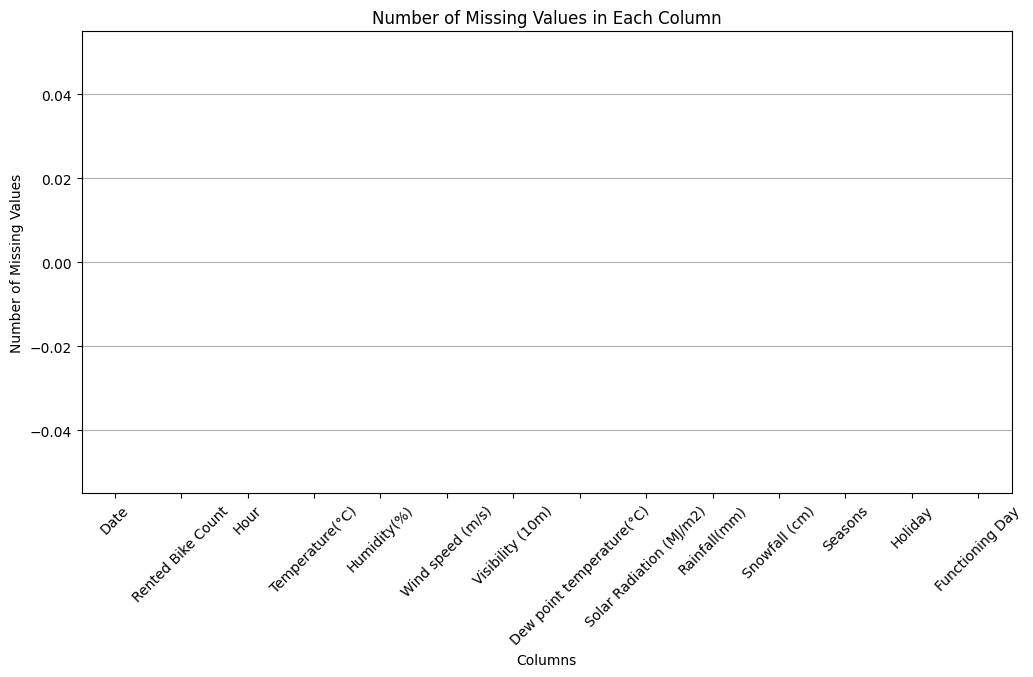

In [311]:
# Visualizing the missing values
missing_values = bike_df.isnull().sum()

# Step 2: Plot the bar chart
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')

# Customize the plot
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

### What did you know about your dataset?

There are 8760 observation and 14 features.





In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.

There are no null values.

Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.

Date has some object data types, it should be datetime data type.

## ***2. Understanding Your Variables***

In [312]:
# Dataset Columns
print(f'Features: {bike_df.columns.to_list()}')

Features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [313]:
# Dataset Describe
bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

Breakdown of Our Features:

Date : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

Rented Bike Count : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

Hour: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

Temperature(°C): Temperature in Celsius, type : Float

Humidity(%): Humidity in the air in %, type : int

Wind speed (m/s) : Speed of the wind in m/s, type : Float

Visibility (10m): Visibility in m, type : int

Dew point temperature(°C): Temperature at the beggining of the day, type : Float

Solar Radiation (MJ/m2): Sun contribution, type : Float

Rainfall(mm): Amount of raining in mm, type : Float

Snowfall (cm): Amount of snowing in cm, type : Float

Seasons: *Season of the year, type : str, there are only 4 season's in data *.

Holiday: If the day is holiday period or not, type: str

Functioning Day: If the day is a Functioning Day or not, type : str

### Check Unique Values for each variable.

In [314]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print(f"No. of unique values in {i} is {bike_df[i].nunique()}.")

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(°C) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 65.
No. of unique values in Visibility (10m) is 1789.
No. of unique values in Dew point temperature(°C) is 556.
No. of unique values in Solar Radiation (MJ/m2) is 345.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [315]:
# Write your code to make your dataset analysis ready.
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [316]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].str.replace('-', '/')
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))

In [317]:
bike_df['Weekday'] = bike_df['Date'].dt.weekday
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [318]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date',],axis=1)

In [319]:
bike_df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  Weekday  month     day  weekdays_weekend  
0  No Holiday             Yes        4     12  Friday                 0  
1  No Holiday             Yes        4     12  Friday                 0  
2  No Holiday             Yes        4     12  Friday                 0  
3  No Holiday             Yes        4     12  Friday                 0  
4  No Holiday             Yes        4     12  Friday                 0

In [320]:
bike_df['weekdays_weekend'].value_counts()

weekdays_weekend
0    6264
1    2496
Name: count, dtype: int64

In [321]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend','Holiday','Functioning_Day']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [322]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   category
 12  Functioning_Day        8760 non-null   category
 13  Weekday                8760 non-null   int32   
 14  month                  8760 non-null   c

**Manipulations and insights**

In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.

Some of the columns name in the dataset are too large and clumsy so we change them into some simple name, and it don't affect our end results.

Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.


 Column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data type if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

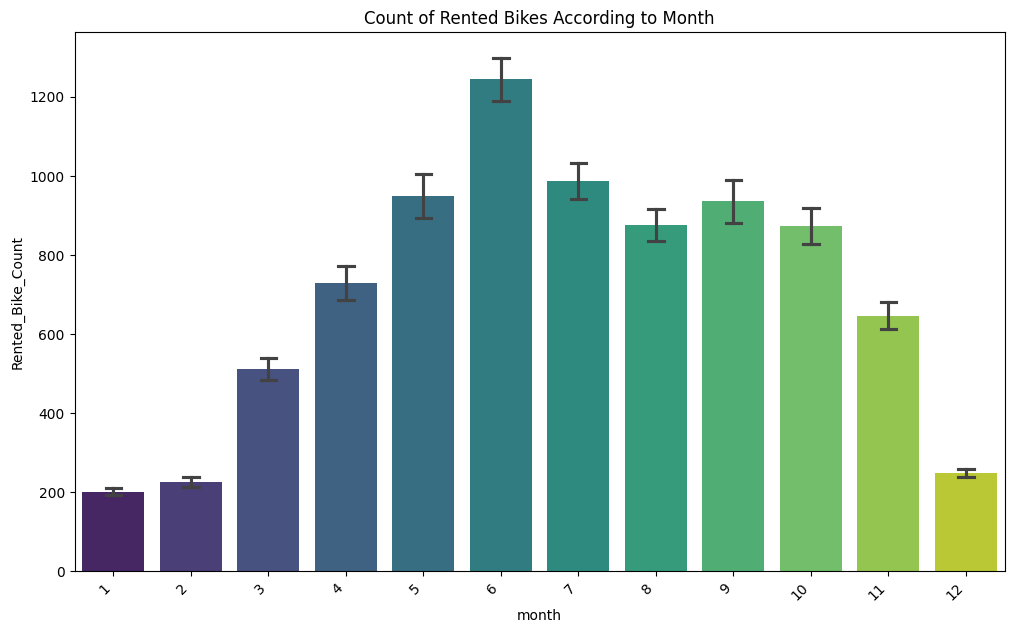

In [323]:
# Chart - 1 visualization code
palette = sns.color_palette("viridis", len(bike_df['month'].unique()))
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=bike_df, x='month', y='Rented_Bike_Count', ax=ax, palette=palette, capsize=.2)
ax.set(title='Count of Rented Bikes According to Month')

# Rotate x-tick labels for better readability if needed
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

##### 1. Why did you pick the specific chart?

 It effectively displays categorical data, allowing easy comparison of bike rental counts across different months

##### 2. What is/are the insight(s) found from the chart?

From the above bar plot we can clearly say that, from the month 5 to 10 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help optimize marketing and inventory strategies during peak rental months, driving positive business impact. However, identifying months with low rentals could indicate seasonal demand dips, necessitating cost management to prevent negative growth.

#### Chart - 2

weekdays_weekend

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

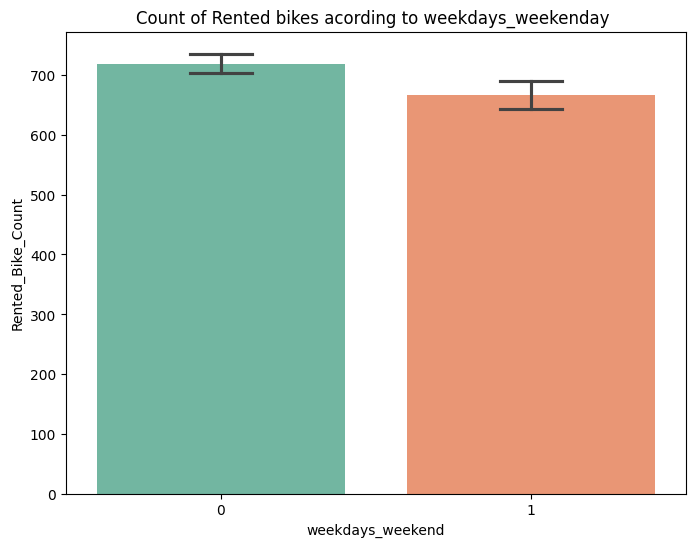

In [324]:
# Chart - 2 visualization code
palette = sns.color_palette("Set2", len(bike_df['weekdays_weekend'].unique()))
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,palette=palette,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

##### 1. Why did you pick the specific chart?

I picked the bar plot because it effectively compares bike rental counts between weekdays and weekends, highlighting differences in demand

##### 2. What is/are the insight(s) found from the chart?

From the above point plot and bar plot we can say that, in the week days which represent in blue colur show that the demand of the bike higher because of the office.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the rental rate is higher on weekdays despite the initial assumption, leveraging this insight can optimize weekday-specific promotions or operational efficiencies, potentially increasing overall revenue. Identifying lower weekend rentals may prompt strategies to boost weekend usage, aiming to balance revenue generation across all days effectively.

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

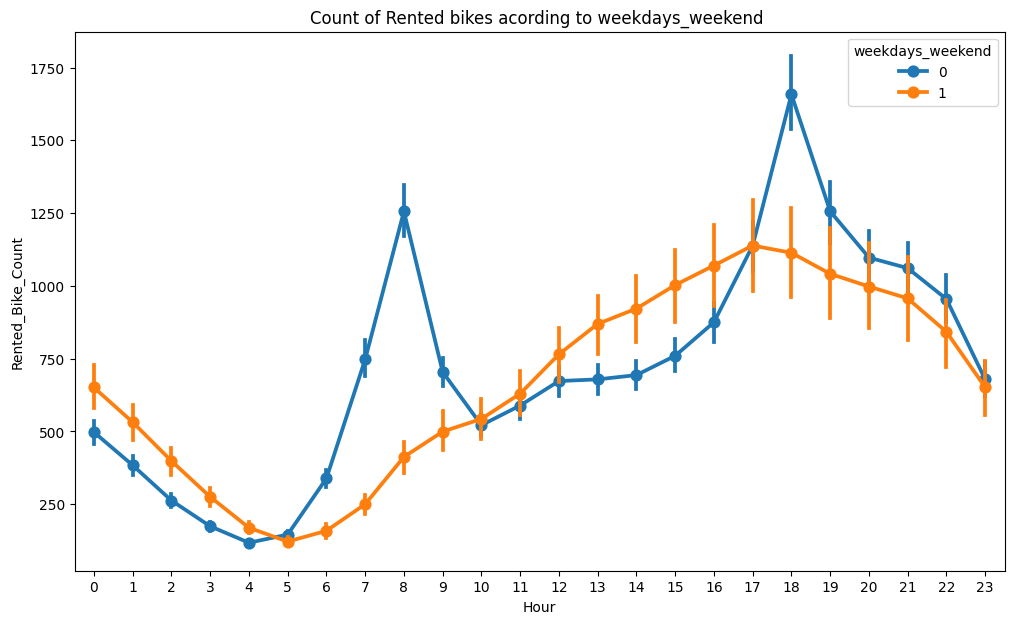

In [325]:
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

Peak Time are 7 am to 9 am and 5 pm to 7 pm*
The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.*

#### Chart - 3

Hour

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

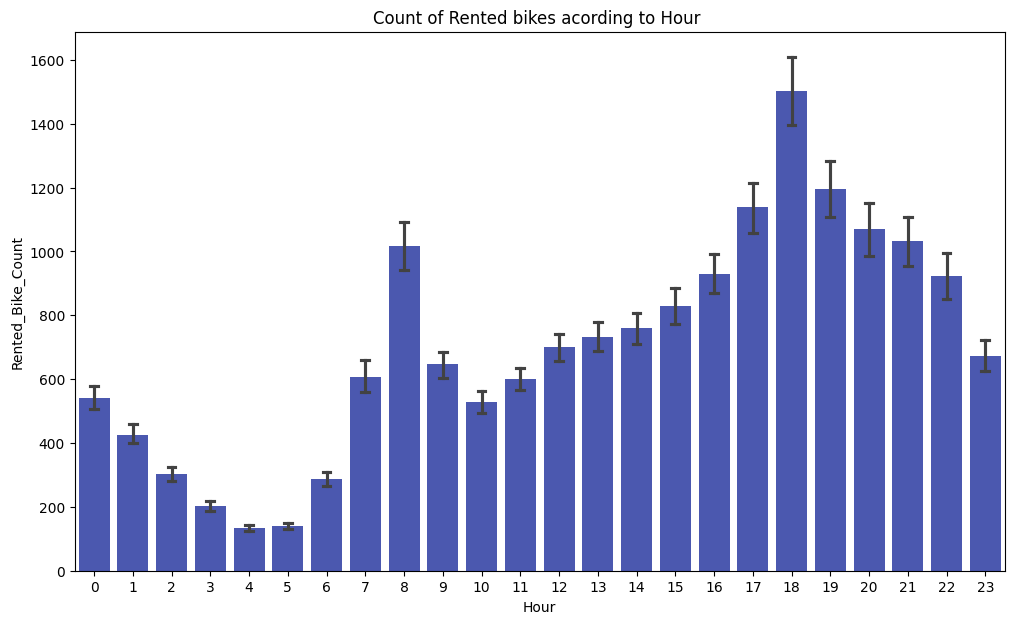

In [326]:
# Chart - 3 visualization code
palette = sns.color_palette("coolwarm", len(bike_df['Hour']))
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,palette=palette,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

##### 1. Why did you pick the specific chart?

I chose the bar plot for visualizing bike rental counts across hours because it effectively displays variations in demand throughout the day, helping to identify peak and off-peak hours at a glance.

##### 2. What is/are the insight(s) found from the chart?

In the above plot which shows, the use of rented bike according the hours and the data are from all over the year.

generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

leveraging insights from peak hours can drive positive business outcomes by aligning resources with customer demand. Conversely, addressing challenges during off-peak hours is crucial to avoid potential negative impacts on profitability and overall business performance.

#### Chart - 4

Functioning Day

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

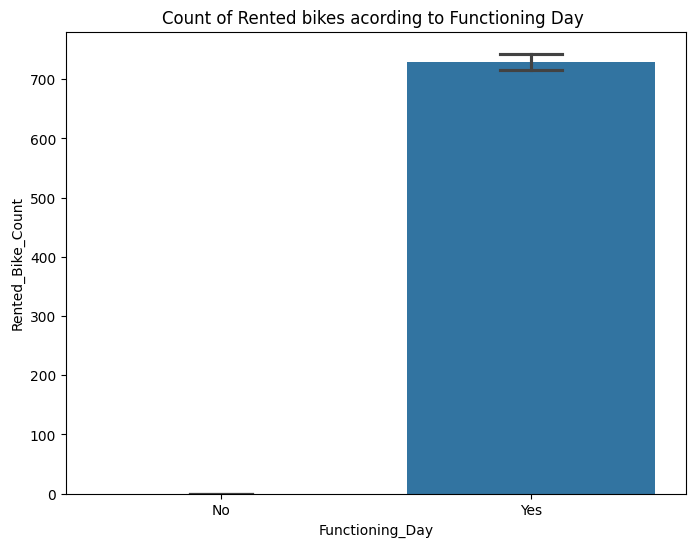

In [327]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

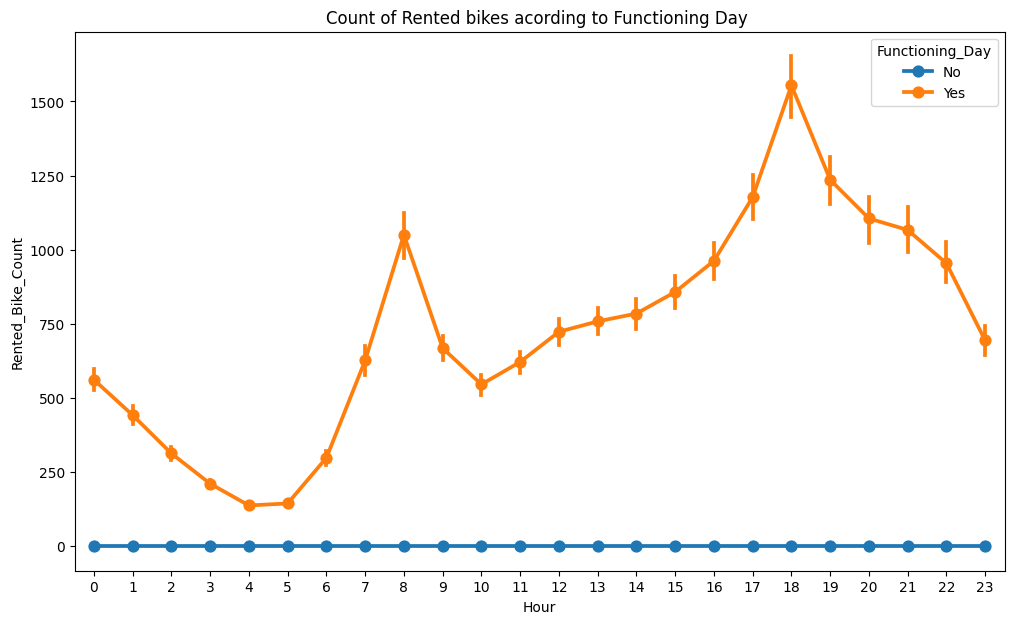

In [328]:
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

##### 1. Why did you pick the specific chart?

I chose the specific chart (bar plot or point plot) because it effectively illustrates the stark contrast in bike rental usage between functioning (working) days and non-functioning (non-working) days.

##### 2. What is/are the insight(s) found from the chart?

In the above bar plot and point plot which shows the use of rented bike in functioning day or non functioning day, and it clearly shows that,
Peoples don't use reneted bikes in no functioning day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Seasons

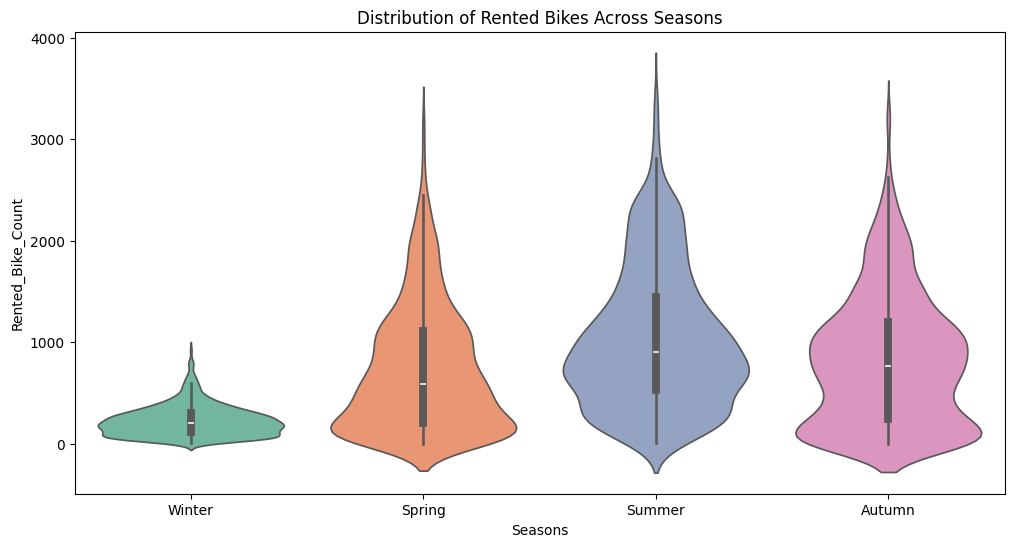

In [329]:
# Chart - 5 visualization code
palette = sns.color_palette("Set2", len(bike_df['Seasons']))

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=bike_df, x='Seasons', y='Rented_Bike_Count', ax=ax, palette=palette)
ax.set(title='Distribution of Rented Bikes Across Seasons')

plt.show()

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

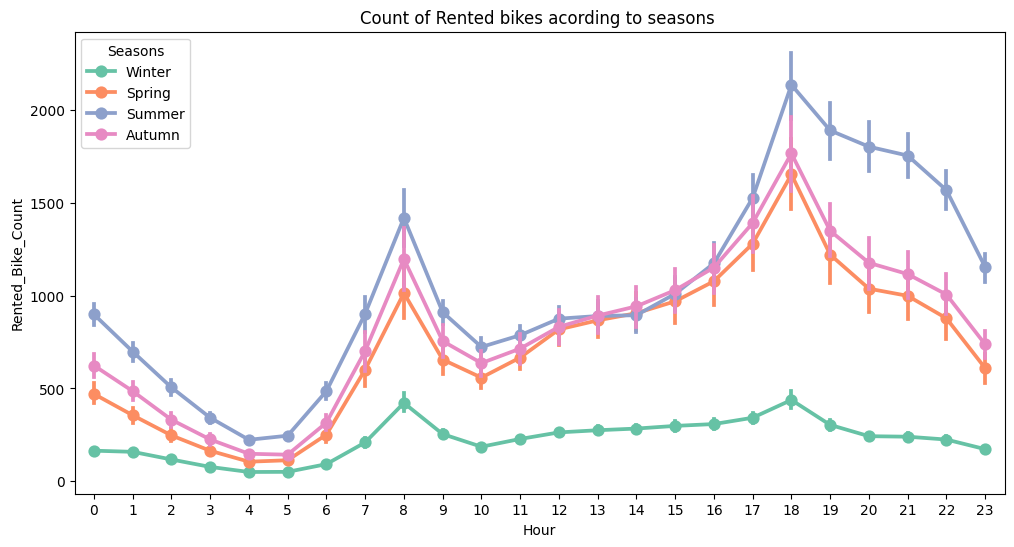

In [330]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',  palette=palette, ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

##### 1. Why did you pick the specific chart?

 Violin plot is selected for its ability to effectively convey the distributional characteristics of numerical data across different categorical groups (seasons), making it a suitable choice for visualizing rented bike counts across seasons in your dataset.

##### 2. What is/are the insight(s) found from the chart?

In the above violin plot and point plot which shows, the use of rented bike in
four different seasons, and it clearly shows that,

In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.

In winter season the use of rented bike is very low maybe because of snowfall, fog, cold etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Holiday

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

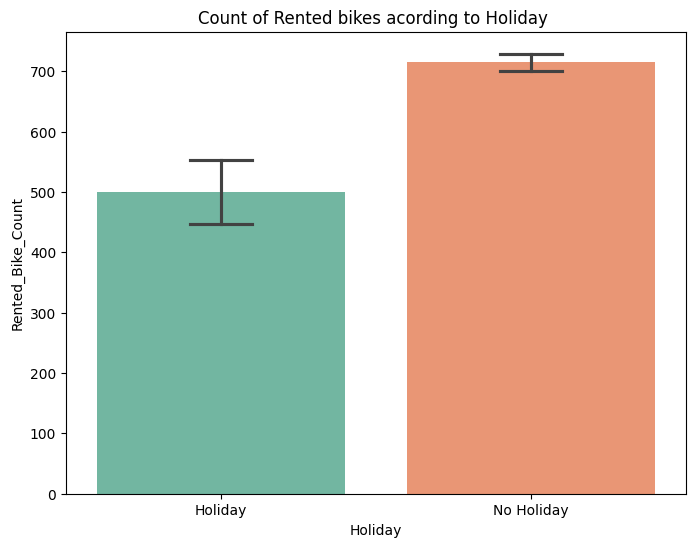

In [331]:
# Chart - 6 visualization code
palette=sns.color_palette("Set2",len(bike_df['Holiday'].unique()))
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,palette=palette,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

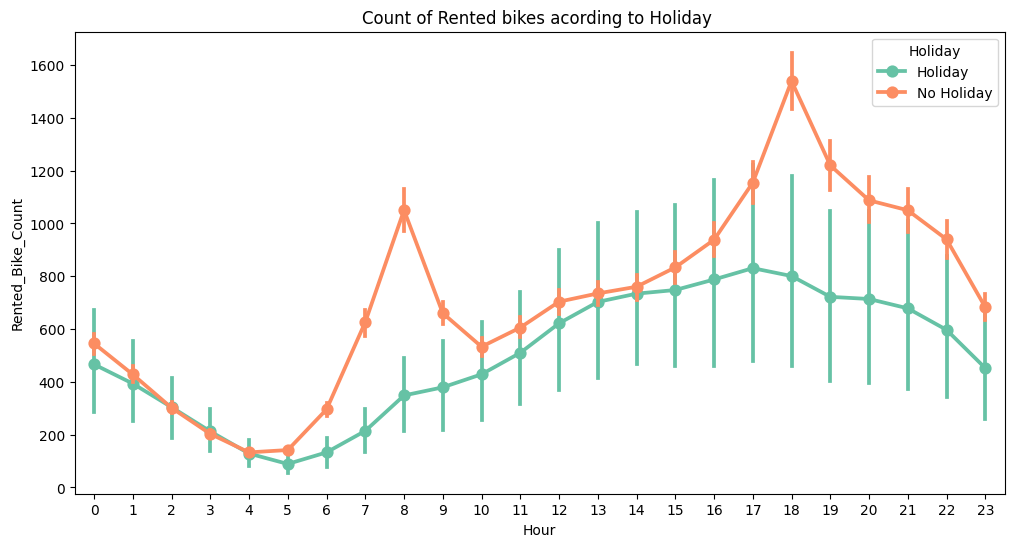

In [332]:
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',palette=palette,ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,
In holiday, people uses the rented bike from 2pm-8pm

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Analyze of Numerical variables**

#### Chart - 7

In [333]:
# Chart - 7 visualization code
# separate numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])
numeric_features

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                   254         -5.2        37         2.2        2000   
1                   204         -5.5        38         0.8        2000   
2                   173         -6.0        39         1.0        2000   
3                   107         -6.2        40         0.9        2000   
4                    78         -6.0        36         2.3        2000   
...                 ...          ...       ...         ...         ...   
8755               1003          4.2        34         2.6        1894   
8756                764          3.4        37         2.3        2000   
8757                694          2.6        39         0.3        1968   
8758                712          2.1        41         1.0        1859   
8759                584          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  Weekday  
0                     -17.6              0.0       0.0       0.0        4  
1                     -17.6              0.0       0.0       0.0        4  
2                     -17.7              0.0       0.0       0.0        4  
3                     -17.6              0.0       0.0       0.0        4  
4                     -18.6              0.0       0.0       0.0        4  
...                     ...              ...       ...       ...      ...  
8755                  -10.3              0.0       0.0       0.0        4  
8756                   -9.9              0.0       0.0       0.0        4  
8757                   -9.9              0.0       0.0       0.0        4  
8758                   -9.8              0.0       0.0       0.0        4  
8759                   -9.3              0.0       0.0       0.0        4  

[8760 rows x 10 columns]

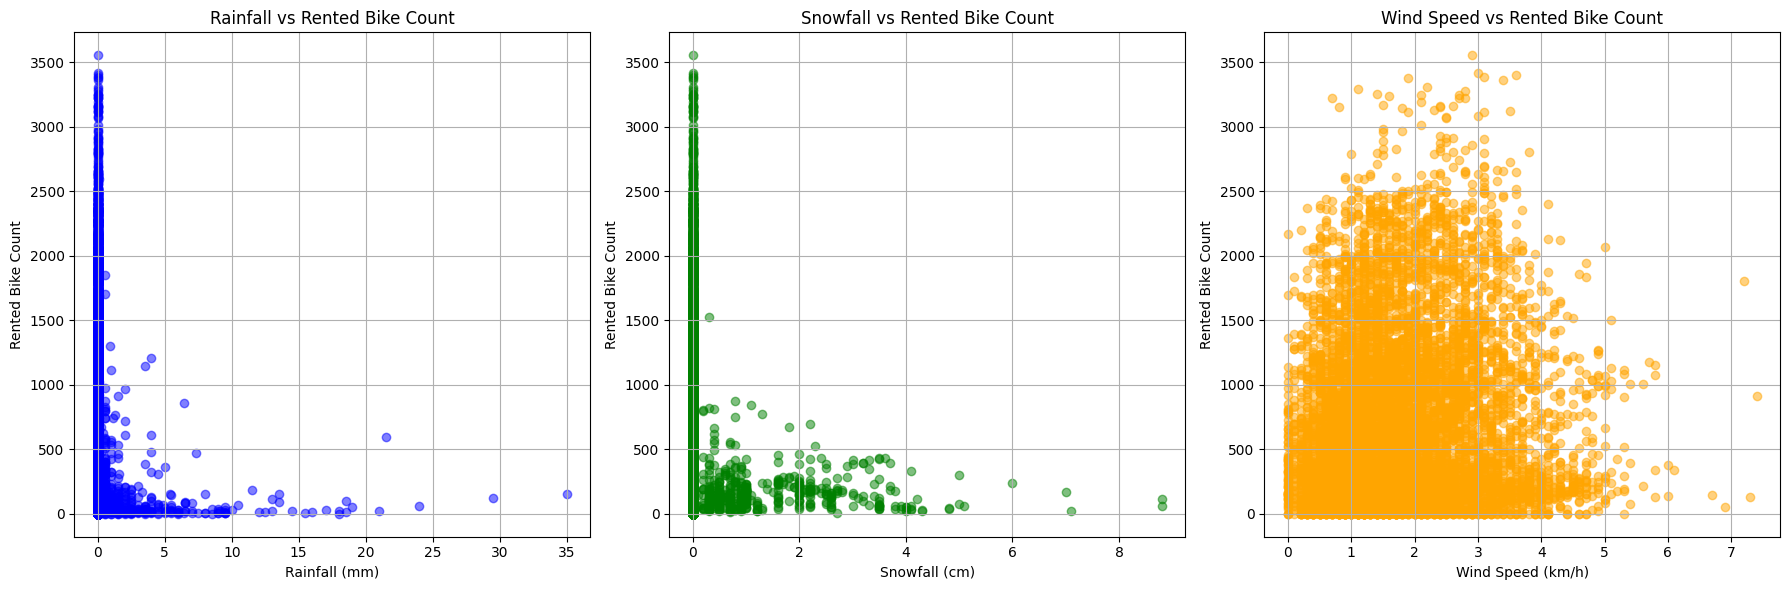

In [334]:
# Create figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Rainfall vs Rented_Bike_Count
axes[0].scatter(bike_df['Rainfall'], bike_df['Rented_Bike_Count'], color='blue', alpha=0.5)
axes[0].set_title('Rainfall vs Rented Bike Count')
axes[0].set_xlabel('Rainfall (mm)')
axes[0].set_ylabel('Rented Bike Count')
axes[0].grid(True)

# Scatter plot for Snowfall vs Rented_Bike_Count
axes[1].scatter(bike_df['Snowfall'], bike_df['Rented_Bike_Count'], color='green', alpha=0.5)
axes[1].set_title('Snowfall vs Rented Bike Count')
axes[1].set_xlabel('Snowfall (cm)')
axes[1].set_ylabel('Rented Bike Count')
axes[1].grid(True)

# Scatter plot for Wind_speed vs Rented_Bike_Count
axes[2].scatter(bike_df['Wind_speed'], bike_df['Rented_Bike_Count'], color='orange', alpha=0.5)
axes[2].set_title('Wind Speed vs Rented Bike Count')
axes[2].set_xlabel('Wind Speed (km/h)')
axes[2].set_ylabel('Rented Bike Count')
axes[2].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

We can see from the plot that, on the y-axis, the amount of rented bike is very low. When we have more than 4 cm of snow, the bike rents is much lower

We can see from the plot that, on the y-axis, the amount of rented bike is very low. When we have more than 10 cm of rain, the bike rents is much lower

The bike rents are great when the wind is moderate but when it increases above 5(km/h)the number of rental bikes decreases

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Lets try to find how is the relation of numerical features with our dependent variable

#### Chart - 8

Numerical VS Rented Bike Count

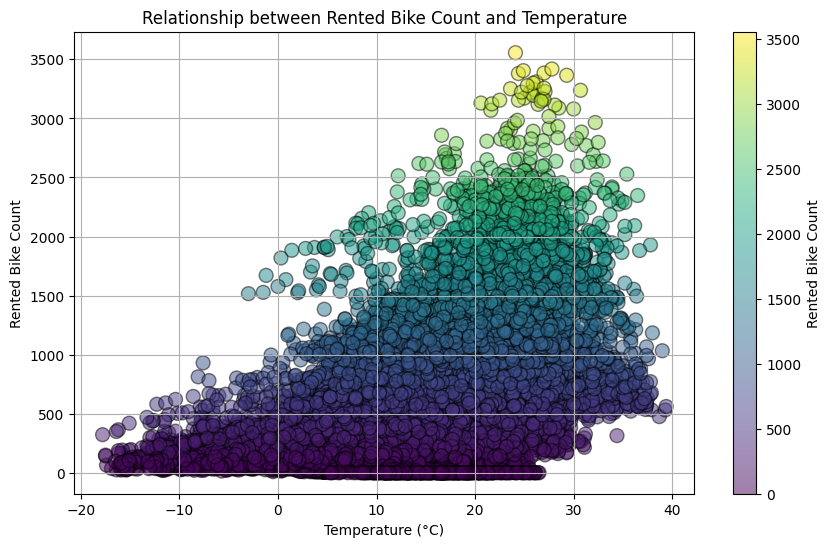

In [335]:
# Chart - 8 visualization code
#plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

x = bike_df['Temperature']
y = bike_df['Rented_Bike_Count']


# Create a colormap instance
norm = Normalize(vmin=min(y), vmax=max(y))
cmap = plt.get_cmap('viridis')  # Choose a colormap (e.g., 'viridis')

# Create scatter plot with colormap
plt.figure(figsize=(10, 6))
sc = plt.scatter(x, y, c=y, cmap=cmap, s=100, alpha=0.5, edgecolor='k', linewidth=1, norm=norm)
plt.colorbar(sc, label='Rented Bike Count')  # Add colorbar showing the scale
plt.title('Relationship between Rented Bike Count and Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot was chosen to visualize the relationship between "Rented_Bike_Count" and "Temperature" because it effectively shows the distribution and potential correlation between two  variable

##### 2. What is/are the insight(s) found from the chart?

From the above plot we see that, people like to ride bikes when it is pretty hot around 25°C in average

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that people prefer riding bikes when it's around 25°C on average can help bike rental businesses by focusing promotional efforts during optimal temperature conditions, potentially increasing rental revenue.

#### Chart - 9

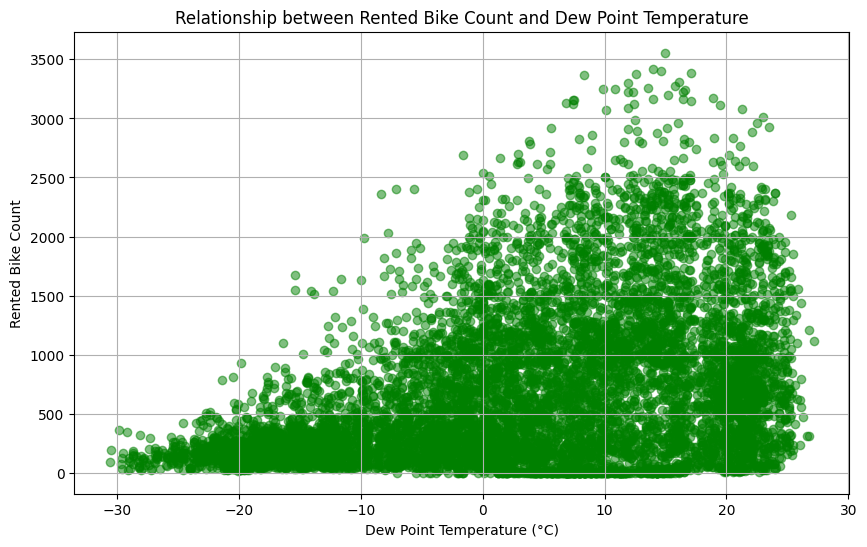

In [336]:
# Chart - 9 visualization code
# plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
plt.figure(figsize=(10, 6))
plt.scatter(bike_df['Dew_point_temperature'], bike_df['Rented_Bike_Count'], color='green', alpha=0.5)
plt.title('Relationship between Rented Bike Count and Dew Point Temperature')
plt.xlabel('Dew Point Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the above plot of "Dew_point_temperature', is almost same as the 'temperature' there is some similarity present we can check it in our next step.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

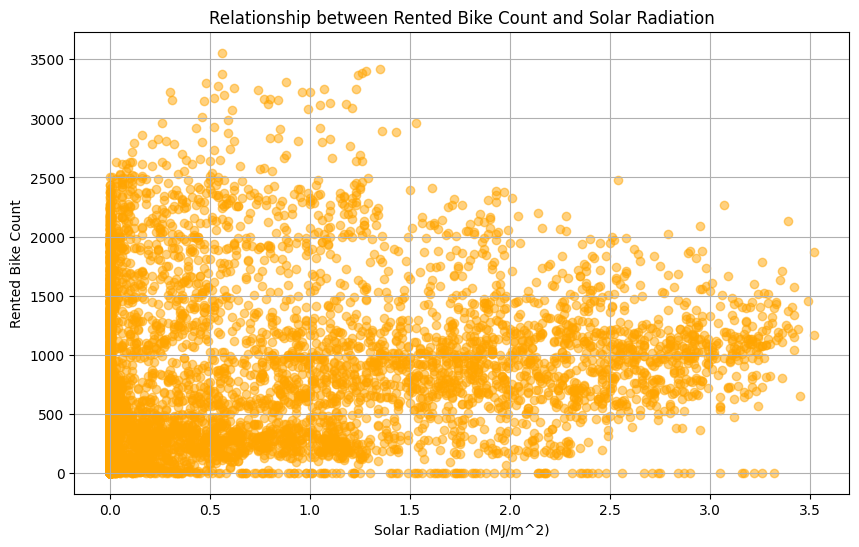

In [337]:
# Chart - 10 visualization code
#plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
plt.figure(figsize=(10, 6))
plt.scatter(bike_df['Solar_Radiation'], bike_df['Rented_Bike_Count'], color='orange', alpha=0.5)
plt.title('Relationship between Rented Bike Count and Solar Radiation')
plt.xlabel('Solar Radiation (MJ/m^2)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

when the solar radiation is below 1.5(MJ?m^2).The count of rented bike is huge and then as the radiation increases the count decreases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

REGRESSION PLOT

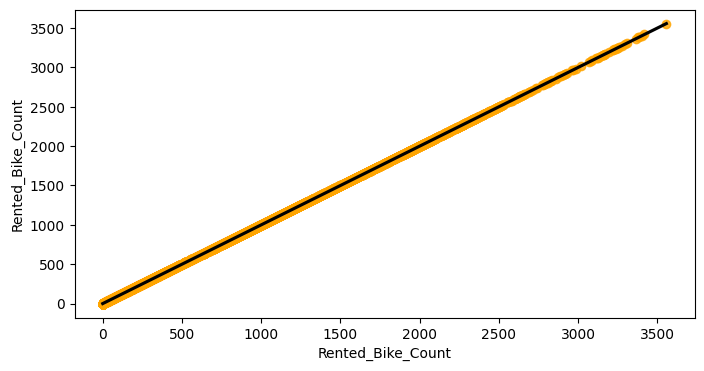

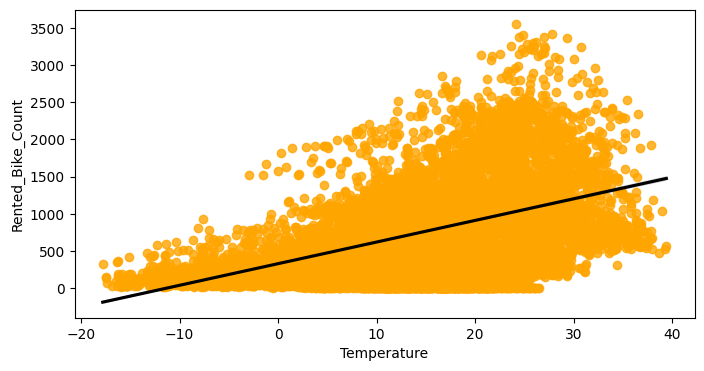

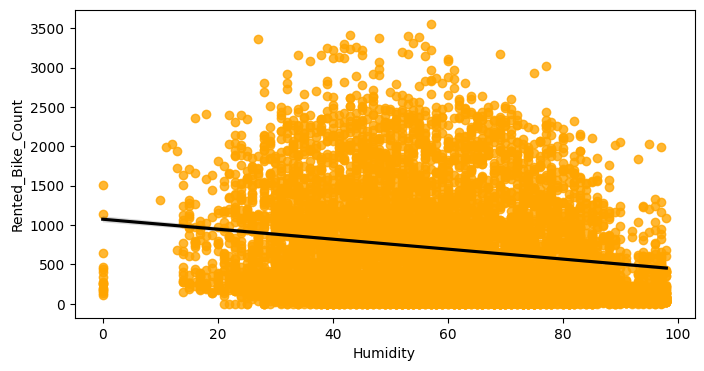

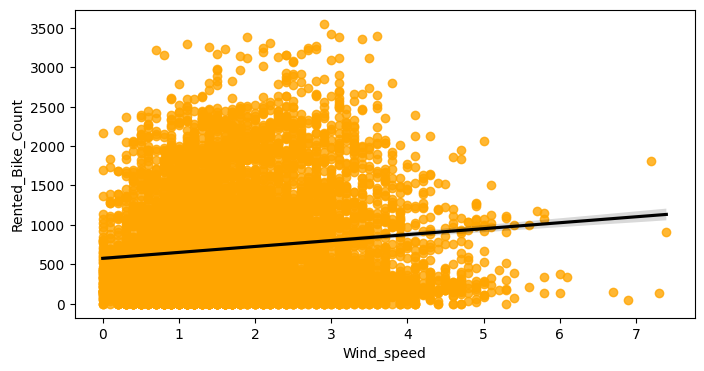

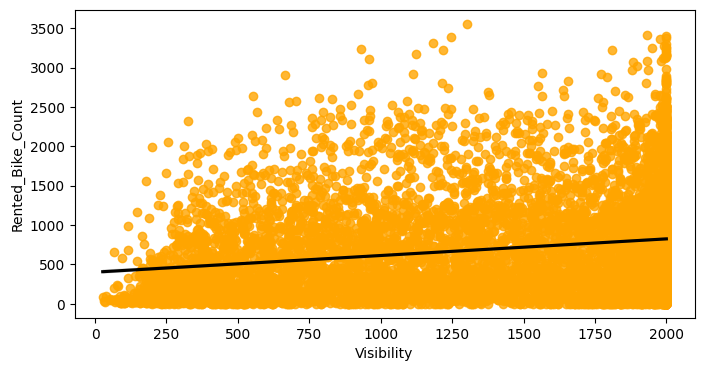

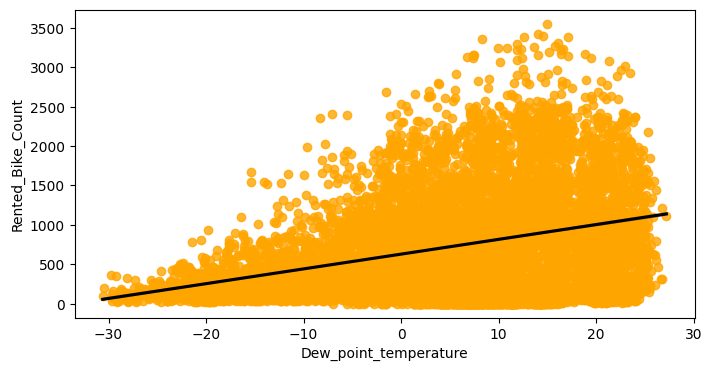

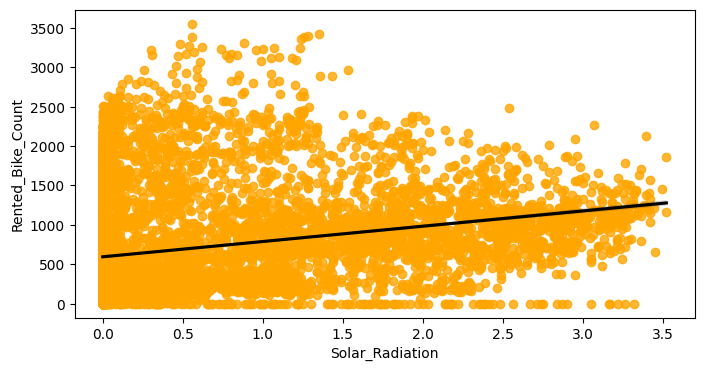

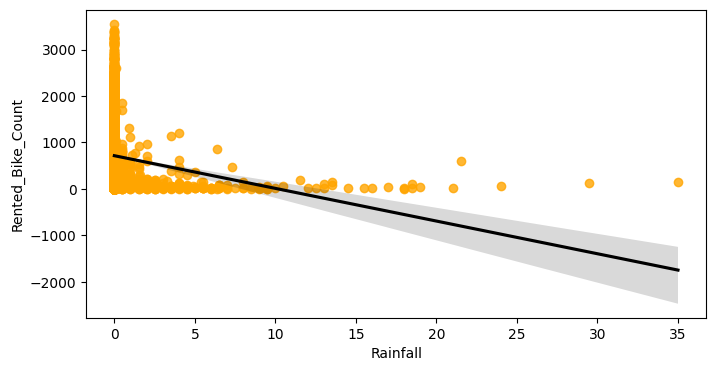

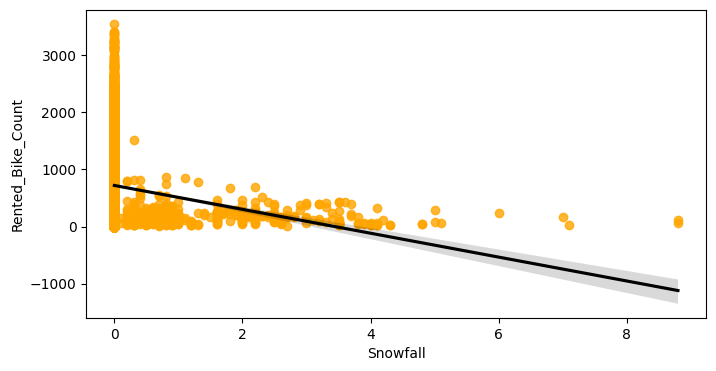

In [338]:
# Chart - 11 visualization code
numeric_features = numeric_features.drop(columns=[ 'weekdays_weekend','Weekday'], errors='ignore')
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

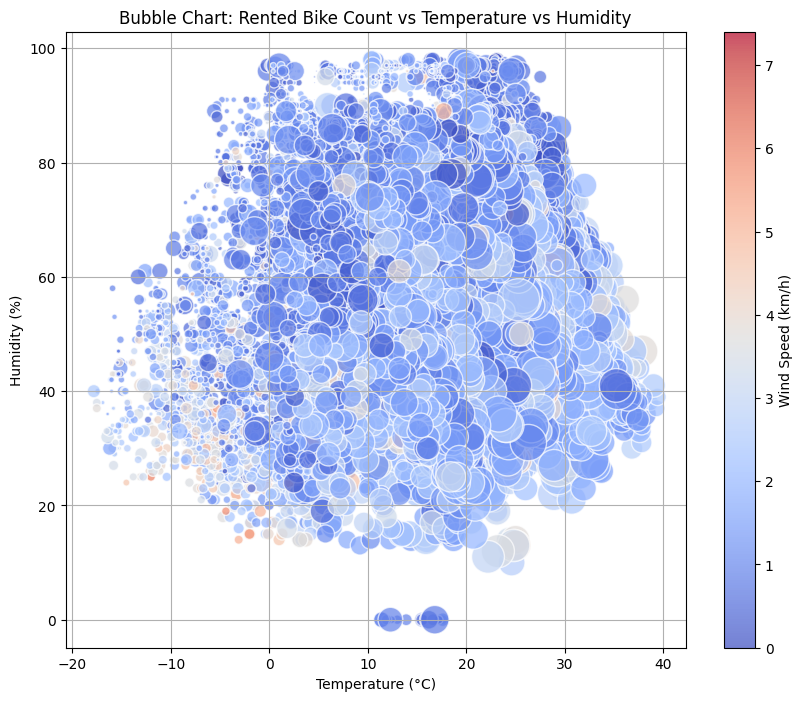

In [339]:
# Chart - 12 visualization code
normalized_counts = (bike_df['Rented_Bike_Count'] - bike_df['Rented_Bike_Count'].min()) / (bike_df['Rented_Bike_Count'].max() - bike_df['Rented_Bike_Count'].min()) * 1000

# Create bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(bike_df['Temperature'], bike_df['Humidity'], s=normalized_counts, c=bike_df['Wind_speed'], cmap='coolwarm', alpha=0.7, edgecolors='w', linewidth=1)
plt.colorbar(label='Wind Speed (km/h)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Bubble Chart: Rented Bike Count vs Temperature vs Humidity')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

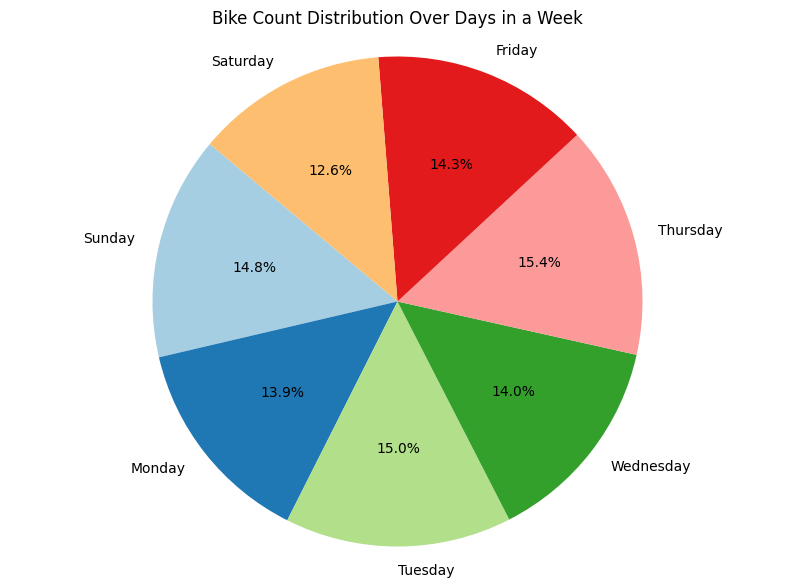

In [340]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Aggregate the bike count by weekdays
weekday_counts = bike_df.groupby('Weekday')['Rented_Bike_Count'].sum()

# Weekday labels (assuming 0 = Sunday, 1 = Monday, ..., 6 = Saturday)
weekday_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Ensure the order of the days of the week is correct
weekday_counts = weekday_counts.reindex(range(7), fill_value=0)

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(weekday_counts, labels=weekday_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Bike Count Distribution Over Days in a Week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


##### 1. Why did you pick the specific chart?

Pie chart was chosen because it effectively communicates how bike counts are distributed across different weekdays, allowing viewers to quickly grasp the relative importance of each day in terms of bike rental activity.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

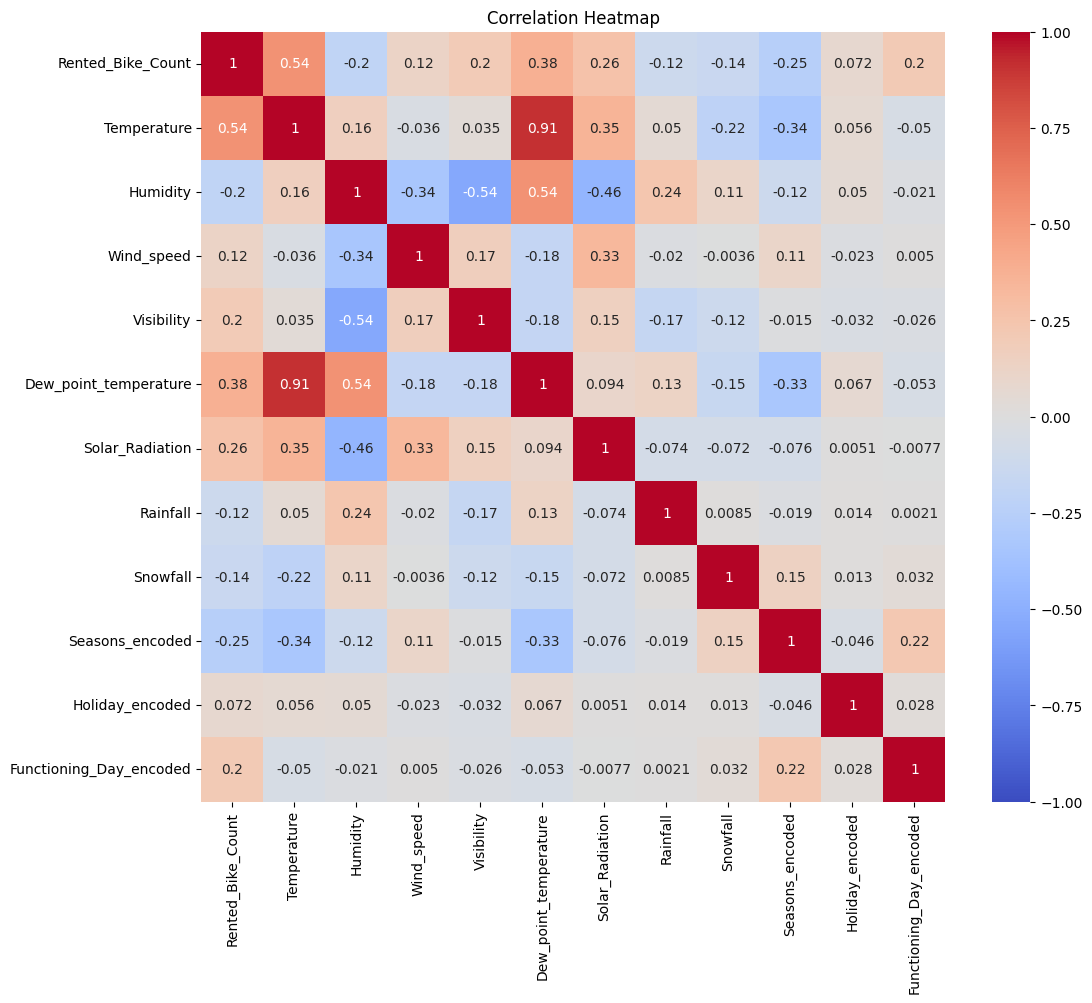

In [341]:
# Correlation Heatmap visualization code
from sklearn.preprocessing import LabelEncoder
numeric_cols = bike_df.select_dtypes(include=['float64', 'int64'])

# Encode categorical variables if needed (example using LabelEncoder)
encoder = LabelEncoder()
bike_df['Seasons_encoded'] = encoder.fit_transform(bike_df['Seasons'])
bike_df['Holiday_encoded'] = encoder.fit_transform(bike_df['Holiday'])
bike_df['Functioning_Day_encoded'] = encoder.fit_transform(bike_df['Functioning_Day'])

# Combine numeric columns and encoded categorical columns for correlation
cols_to_correlate = numeric_cols.columns.tolist() + ['Seasons_encoded', 'Holiday_encoded', 'Functioning_Day_encoded']
correlation_data = bike_df[cols_to_correlate]

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

The heatmap was chosen for its ability to visually represent correlation coefficients between variables, using color gradients to quickly indicate strength and direction of relationships, making it ideal for exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

Temperature and Due point temperature are having strong positive correlation where as visibility and humidity have negative correlation.

#### Chart - 15 - Pair Plot

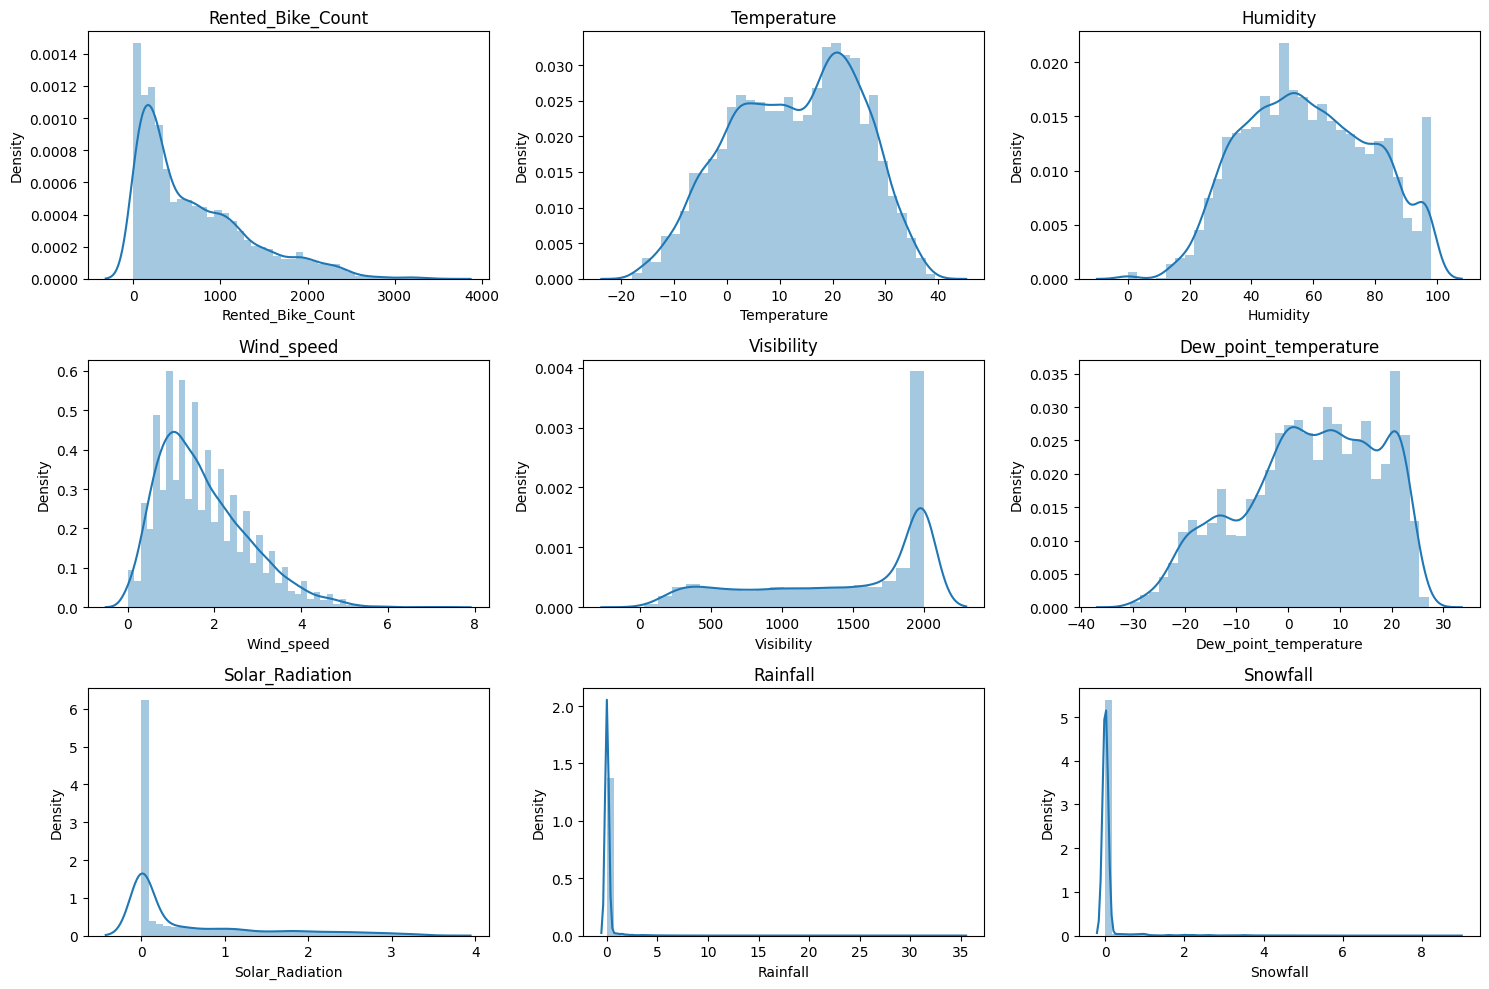

In [342]:
# Pair Plot visualization code
#printing displots to analyze the distribution of all numerical features

n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

I selected the set of distplots (distribution plots) because they provide a concise visual overview of the distribution and spread of each numeric feature in the dataset

##### 2. What is/are the insight(s) found from the chart?

Right skewed columns are Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

Left skewed columns are Visibility (10m), Dew point temperature(°C)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement 1: "The average number of rented bikes is significantly different between weekdays and weekends."

Null Hypothesis (H0): The average number of rented bikes on weekdays is equal to the average number on weekends.

Alternative Hypothesis (H1): The average number of rented bikes on weekdays is significantly different from the average number on weekends.

#### 2. Perform an appropriate statistical test.

T-statistic: 3.4150448192415523
P-value: 0.0006406092926737229
Reject the null hypothesis. The average number of rented bikes varies significantly across different seasons.


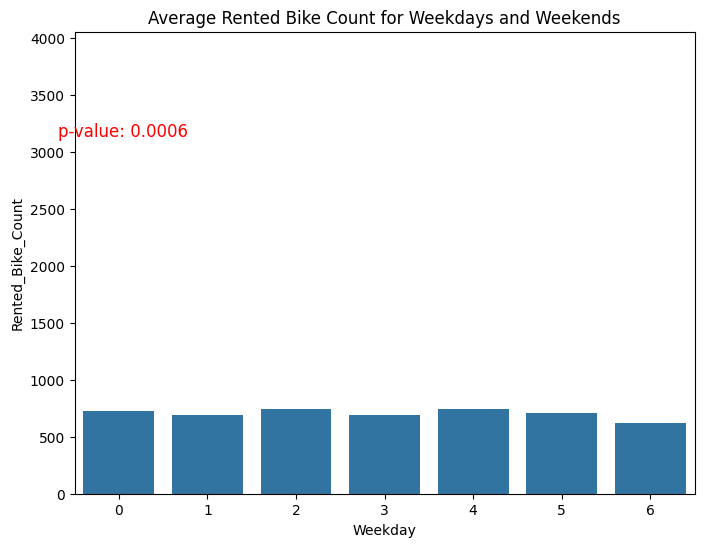

In [343]:
# Separate data into weekdays and weekends based on weekdays_weekend column
import scipy.stats as stats
weekdays_data = bike_df[bike_df['weekdays_weekend'] == 0]['Rented_Bike_Count']
weekends_data = bike_df[bike_df['weekdays_weekend'] == 1]['Rented_Bike_Count']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(weekdays_data, weekends_data)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Define significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. The average number of rented bikes varies significantly across different seasons.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average number of rented bikes across seasons.")

# Visualization with ylim adjustment
plt.figure(figsize=(8, 6))
sns.barplot(x='Weekday', y='Rented_Bike_Count', data=bike_df, ci=None)
plt.title('Average Rented Bike Count for Weekdays and Weekends')

# Display p-value
plt.text(alpha, 0.9 * max(bike_df['Rented_Bike_Count']), f'p-value: {p_value:.4f}', ha='center', va='center_baseline', color='red', fontsize=12)

# Adjust ylim to start from 0
plt.ylim(0, max(bike_df['Rented_Bike_Count']) + 500)

plt.show()


##### Which statistical test have you done to obtain P-Value?

Independent two-sample t-test (stats.ttest_ind from scipy.stats)

##### Why did you choose the specific statistical test?

We chose the t-test because we are comparing the means of two independent groups (weekday and weekend counts) to determine if there's a significant difference in the average number of rented bikes.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement 2: "The distribution of rented bike counts varies across different seasons."

Null Hypothesis (H0): The average number of rented bikes is equal across all seasons.

Alternative Hypothesis (H1): The average number of rented bikes varies significantly across different seasons.

#### 2. Perform an appropriate statistical test.

ANOVA F-statistic: 776.4678
P-value: 0.0000
Reject the null hypothesis. The average number of rented bikes varies significantly across different seasons.


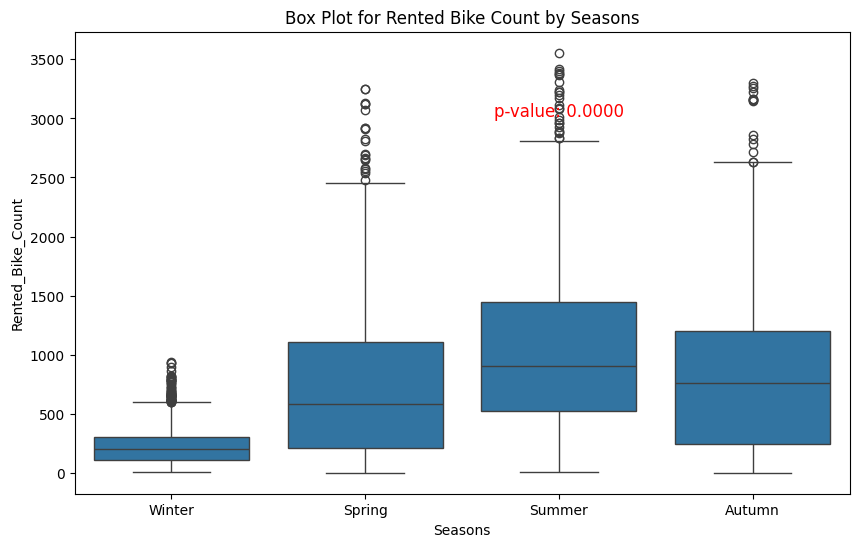

In [344]:
# Perform Statistical Test to obtain P-Value
# Extract data for each season
spring = bike_df[bike_df['Seasons'] == 'Spring']['Rented_Bike_Count']
summer = bike_df[bike_df['Seasons'] == 'Summer']['Rented_Bike_Count']
autumn = bike_df[bike_df['Seasons'] == 'Autumn']['Rented_Bike_Count']
winter = bike_df[bike_df['Seasons'] == 'Winter']['Rented_Bike_Count']

# Perform ANOVA test
stat, p_value = stats.f_oneway(spring, summer, autumn, winter)

# Print the results
print(f'ANOVA F-statistic: {stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The average number of rented bikes varies significantly across different seasons.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average number of rented bikes across seasons.")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Rented_Bike_Count', data=bike_df)
plt.title('Box Plot for Rented Bike Count by Seasons')

# Display p-value
plt.text(2, max(bike_df['Rented_Bike_Count']) - 500, f'p-value: {p_value:.4f}', ha='center', va='center', color='red', fontsize=12)


plt.show()



##### Which statistical test have you done to obtain P-Value?

One-way Analysis of Variance (ANOVA) (stats.f_oneway from scipy.stats)

##### Why did you choose the specific statistical test?

We chose ANOVA because we are comparing the means of more than two independent groups (spring, summer, autumn, winter counts) to assess if there's a significant difference in the distribution of rented bike counts across seasons.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement 3:"There is a significant correlation between temperature and the number of rented bikes."

Null Hypothesis (H0): There is no correlation between temperature and the number of rented bikes.

Alternative Hypothesis (H1): There is a significant correlation between temperature and the number of rented bikes.

#### 2. Perform an appropriate statistical test.

Pearson correlation test: 776.4678
P-value: 0.0000
Reject the null hypothesis. The average number of rented bikes varies significantly across different seasons.


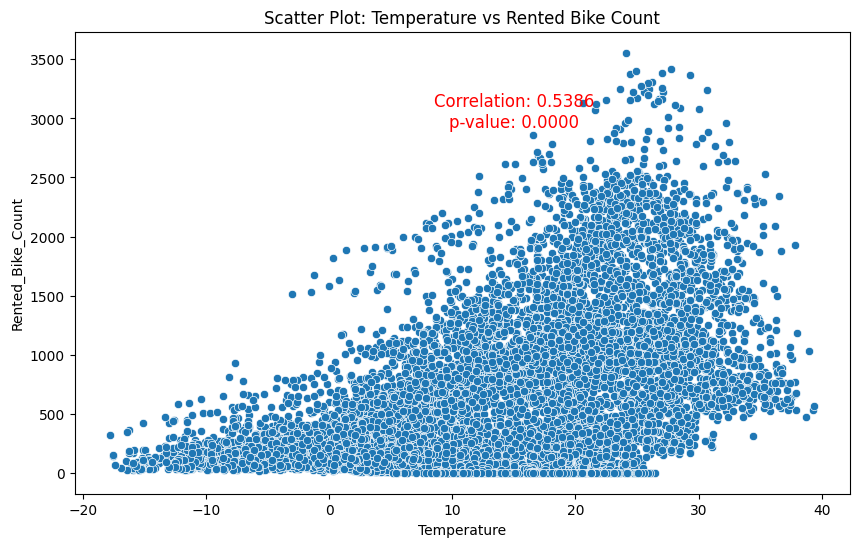

In [345]:
# Perform Statistical Test to obtain P-Value
# Hypothesis Testing
temperature = bike_df['Temperature']
rented_bike_count = bike_df['Rented_Bike_Count']

# Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(temperature, rented_bike_count)

# Print the results
print(f'Pearson correlation test: {stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The average number of rented bikes varies significantly across different seasons.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average number of rented bikes across seasons.")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Rented_Bike_Count', data=bike_df)
plt.title('Scatter Plot: Temperature vs Rented Bike Count')

# Display correlation coefficient and p-value on the chart
plt.text(15, max(bike_df['Rented_Bike_Count']) - 500, f'Correlation: {correlation_coefficient:.4f}\np-value: {p_value:.4f}', ha='center', va='center', color='red', fontsize=12)

plt.show()

##### Which statistical test have you done to obtain P-Value?

Pearson correlation test (stats.pearsonr from scipy.stats)

##### Why did you choose the specific statistical test?

We chose the Pearson correlation test because we want to assess the linear relationship between two continuous variables (temperature and rented bike count) and determine if there's a significant correlation.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [346]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values
missing_values = bike_df.isnull().sum()
print(missing_values)

Rented_Bike_Count          0
Hour                       0
Temperature                0
Humidity                   0
Wind_speed                 0
Visibility                 0
Dew_point_temperature      0
Solar_Radiation            0
Rainfall                   0
Snowfall                   0
Seasons                    0
Holiday                    0
Functioning_Day            0
Weekday                    0
month                      0
day                        0
weekdays_weekend           0
Seasons_encoded            0
Holiday_encoded            0
Functioning_Day_encoded    0
dtype: int64


Since, we do not have any missing values found in our dataset so there is no requirement of imputations.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since, we do not have any missing values found in our dataset so there is no requirement of imputations.

### 2. Handling Outliers

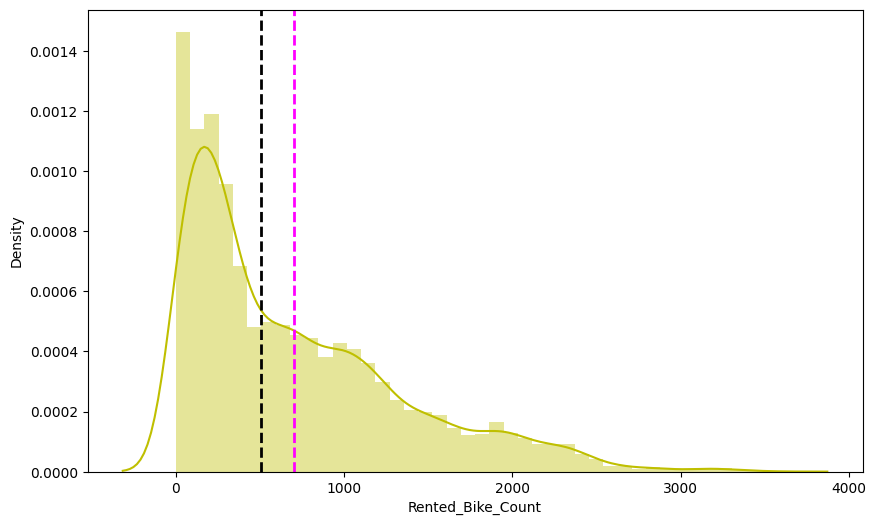

In [347]:
# Handling Outliers & Outlier treatments
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

The above graph shows that, Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

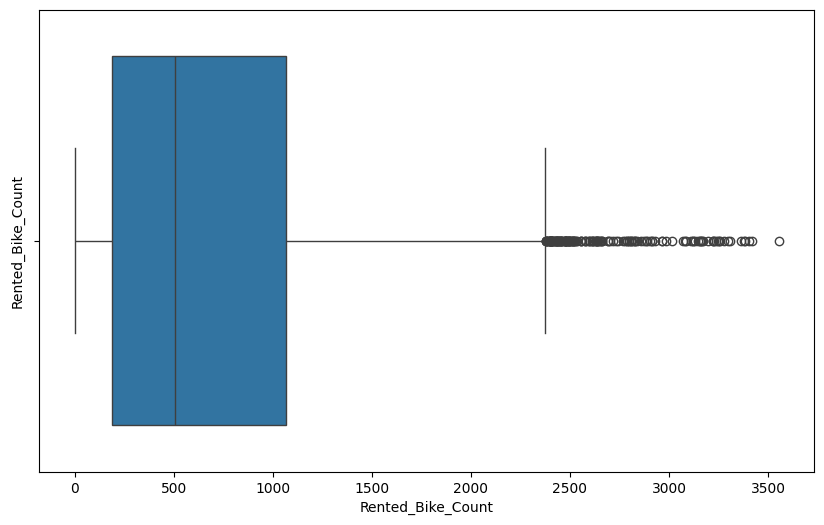

In [348]:
# Boxplot for Rented bike Count to check outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

In [349]:
# outliers treatments
bike_df.loc[bike_df['Rainfall']>=4,'Rainfall']= 4
bike_df.loc[bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
bike_df.loc[bike_df['Snowfall']>2,'Snowfall']= 2
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']= 4

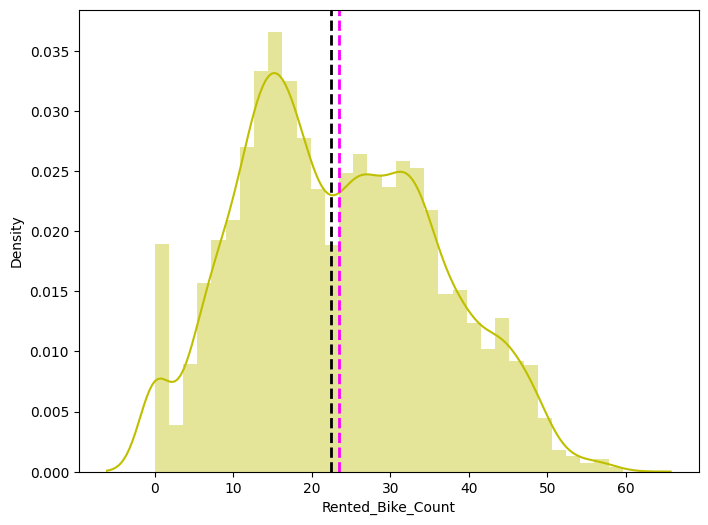

In [350]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(8,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

we have applied outlier treatment techniques to the dataset by replacing the outliers with the maximum values.

Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

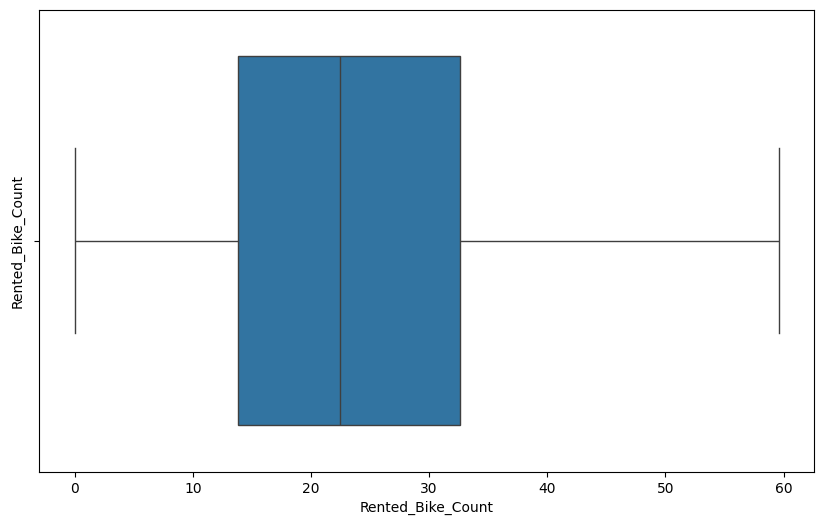

In [351]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

### 3. Categorical Encoding

In [352]:
# Label encode 'Seasons'
label_encoder = LabelEncoder()
bike_df['Seasons'] = label_encoder.fit_transform(bike_df['Seasons'])

# One-hot encode 'Holiday' and 'Functioning_Day'
bike_df = pd.get_dummies(bike_df, columns=['Holiday', 'Functioning_Day'], drop_first=True)

# Drop non-numeric 'day' column
bike_df.drop(columns=['day'], inplace=True)

In [353]:
# Compute correlation matrix
correlation_matrix = bike_df.corr()

# Extract correlation with target variable
correlation_with_target = correlation_matrix['Rented_Bike_Count'].sort_values(ascending=False)

# Display feature correlation with the target variable
print("\nFeature Correlation with Target Variable:")
print(correlation_with_target)


Feature Correlation with Target Variable:
Rented_Bike_Count          1.000000
Temperature                0.538558
Hour                       0.410257
Dew_point_temperature      0.379788
Solar_Radiation            0.265658
Functioning_Day_encoded    0.203943
Functioning_Day_Yes        0.203943
Visibility                 0.199280
month                      0.133514
Wind_speed                 0.131549
Holiday_encoded            0.072338
Holiday_No Holiday         0.072338
Weekday                   -0.029357
weekdays_weekend          -0.036467
Snowfall                  -0.160917
Rainfall                  -0.174224
Humidity                  -0.199780
Seasons                   -0.253058
Seasons_encoded           -0.253058
Name: Rented_Bike_Count, dtype: float64


#### What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoding have been used.

A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [354]:
# Expand Contraction

#### 2. Lower Casing

In [355]:
# Lower Casing

#### 3. Removing Punctuations

In [356]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [357]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [358]:
# Remove Stopwords

In [359]:
# Remove White spaces

#### 6. Rephrase Text

In [360]:
# Rephrase Text

#### 7. Tokenization

In [361]:
# Tokenization

#### 8. Text Normalization

In [362]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [363]:
# POS Taging

#### 10. Text Vectorization

In [364]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [365]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

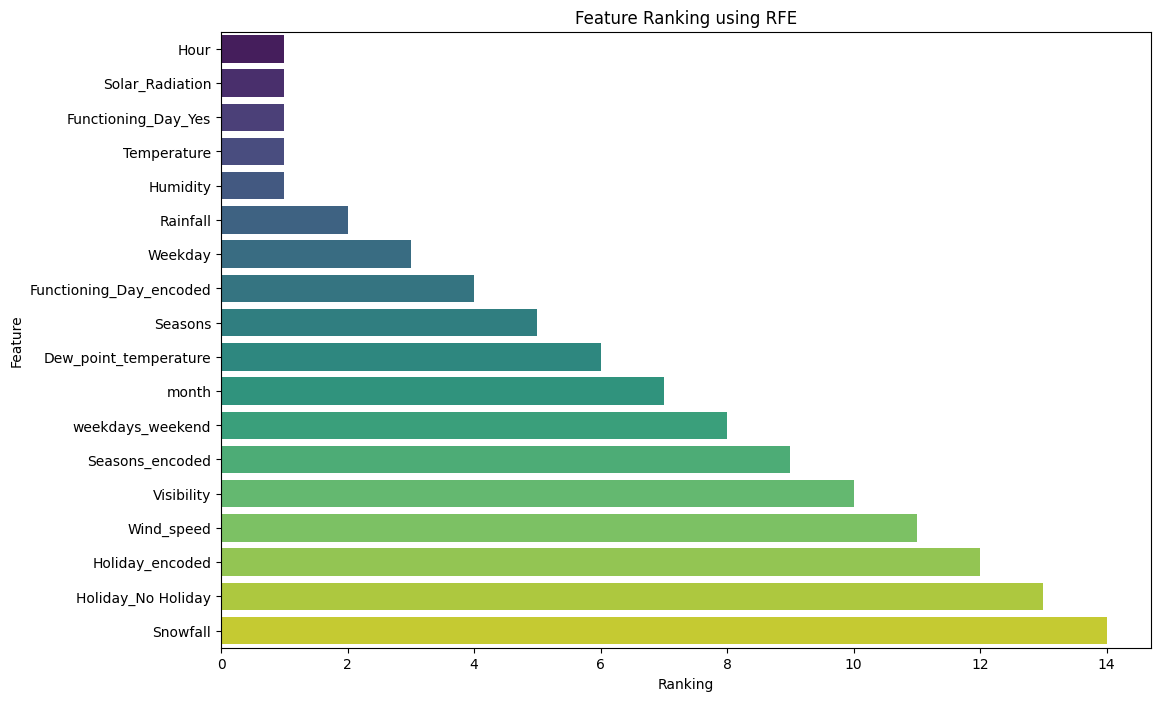

Selected Features:
Index(['Hour', 'Temperature', 'Humidity', 'Solar_Radiation',
       'Functioning_Day_Yes'],
      dtype='object')


In [366]:
from sklearn.feature_selection import RFE
# Split the data into features and target


X = bike_df.drop(columns=['Rented_Bike_Count'])
y = bike_df['Rented_Bike_Count']

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE with the model and number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE
rfe.fit(X, y)

# Get the ranking of the features
ranking = rfe.ranking_

# Create a DataFrame for visualization
feature_ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': ranking
})

# Sort the DataFrame by ranking
feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')

# Plot the feature rankings
plt.figure(figsize=(12, 8))
sns.barplot(x='Ranking', y='Feature', data=feature_ranking_df, palette='viridis')
plt.title('Feature Ranking using RFE')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.show()

# Display the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

##### What all feature selection methods have you used  and why?

Random Forest Regression was employed for feature selection. This method leverages the ensemble nature of Random Forests to assess feature importance based on how much they contribute to reducing prediction errors across multiple decision trees. It's effective in identifying key features that significantly influence the model's predictive power, offering robust insights into which variables are most impactful for accurately predicting bike sharing demand.


##### Which all features you found important and why?

Selected Features:

Hour

Temperature(°C)

Solar Radiation (MJ/m2)

Feature Importance Ranking:

Hour: Highest importance, indicating a significant impact on bike demand. This aligns with the natural variance in commuting patterns throughout the day.

Temperature(°C): Second in importance, emphasizing the correlation between temperature and bike usage. Users are likely more inclined to bike in favorable weather conditions.

Solar Radiation (MJ/m2): Holds notable importance, indicating a positive relationship between bike demand and sunlight. This aligns with the expectation that more people prefer biking on sunny days.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [367]:
# Transform Your data

### 6. Data Scaling

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

The need for additional dimensionality reduction seems minimal.

In [368]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [369]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns for simplicity (you may need to handle categorical variables differently)
numeric_df = bike_df.select_dtypes(include=['number'])

# Separate features (X) and target variable (y)
X = numeric_df.drop('Rented_Bike_Count', axis=1)
y = numeric_df['Rented_Bike_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomForestRegressor for feature selection
rf_model = RandomForestRegressor(random_state=42)
sfm = SelectFromModel(rf_model)
X_train_selected = sfm.fit_transform(X_train, y_train)
X_test_selected = sfm.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Print the shape of the datasets after preprocessing
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)


Shape of X_train_scaled: (7008, 15)
Shape of X_test_scaled: (1752, 15)


##### What data splitting ratio have you used and why?

The 0.2 test size (or 80-20 split) is chosen to balance model training and evaluation effectively, ensuring both sufficient training data for learning patterns and sufficient testing data for evaluating model performance on unseen data. Adjustments to this ratio should consider specific characteristics of the dataset and modeling objectives.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

For a regression problem like bike rental prediction, the notion of dataset imbalance doesn't apply in the same way it would for a classification problem. Instead, you're working with a distribution of numerical values for the target variable (bike rental counts).

In [370]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [371]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create and train the Linear Regression model
linear_model = LinearRegression()

# Fit the Algorithm
linear_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print evaluation metrics
print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_linear)
print("Mean Absolute Error:", mae_linear)
print("R-squared Score:", r2_linear)

# Predict on the model

Linear Regression Metrics:
Mean Squared Error: 201686.96034947815
Mean Absolute Error: 328.6693362217888
R-squared Score: 0.515927561331742


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression: Model Explanation: Linear Regression assumes a linear relationship between the input features and the target variable. It finds the best-fitting line through the data.

**PERFORMANCE**

Mean Squared Error: 201686.96034947815

Mean Absolute Error: 328.6693362217888

R-squared Score: 0.515927561331742

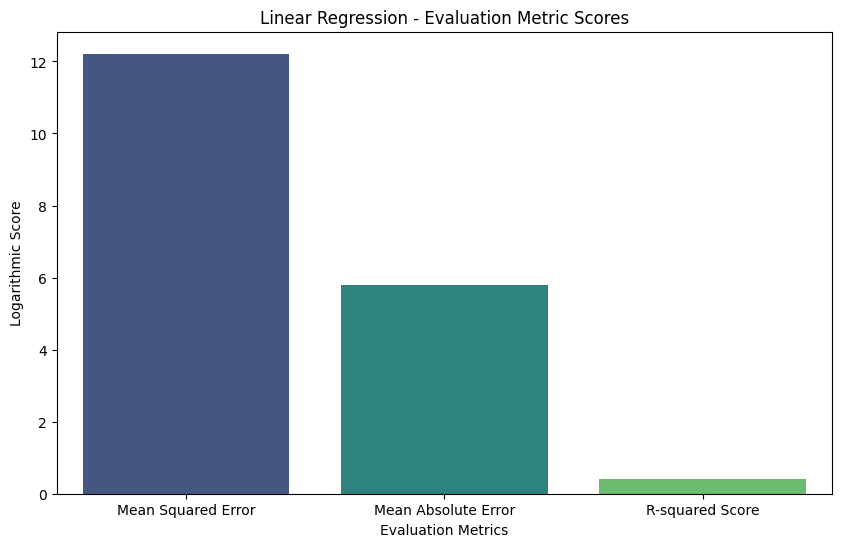

In [372]:
# Visualizing evaluation Metric Score chart
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation metrics and scores
metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
scores = [mse_linear, mae_linear, r2_linear]

# Log-transform the scores for better visualization
log_scores = np.log1p(scores)

# Plotting Evaluation Metric Score Chart with log-transformed values
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=log_scores, palette='viridis')
plt.title('Linear Regression - Evaluation Metric Scores')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Logarithmic Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [373]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the model
ridge_model = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 1, 10]}

# Create the GridSearchCV object
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the Algorithm
# Fit the algorithm with the optimized parameters
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'alpha': 0.1}


In [374]:
# Define the Ridge Regression model with best parameters
best_alpha = best_params['alpha']
ridge_model = Ridge(alpha=best_alpha)

# Fit the model with the optimized parameters
ridge_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate performance metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print evaluation metrics
print("Ridge Regression Metrics (Best Parameters):")
print("Mean Squared Error:", mse_ridge)
print("Mean Absolute Error:", mae_ridge)
print("R-squared Score:", r2_ridge)

Ridge Regression Metrics (Best Parameters):
Mean Squared Error: 201682.25895542034
Mean Absolute Error: 328.6505427404654
R-squared Score: 0.5159388452307245


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. It systematically searches through a manually specified subset of hyperparameter space. This method is straightforward and ensures that all possible combinations within the specified grid are explored.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer here

### ML Model - 2

In [375]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("\nRandom Forest Regression Metrics:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared Score:", r2_rf)


Random Forest Regression Metrics:
Mean Squared Error: 169710.23099170066
Mean Absolute Error: 271.2842423867672
R-squared Score: 0.5926754747022073


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest Regression: Model Explanation: Random Forest is an ensemble method that builds a multitude of decision trees at training time and outputs the average prediction of the individual trees for regression tasks.

**PERFORMANCE**



Random Forest Regression Metrics:

Mean Squared Error: 169710.23099170066

Mean Absolute Error: 271.2842423867672

R-squared Score: 0.5926754747022073

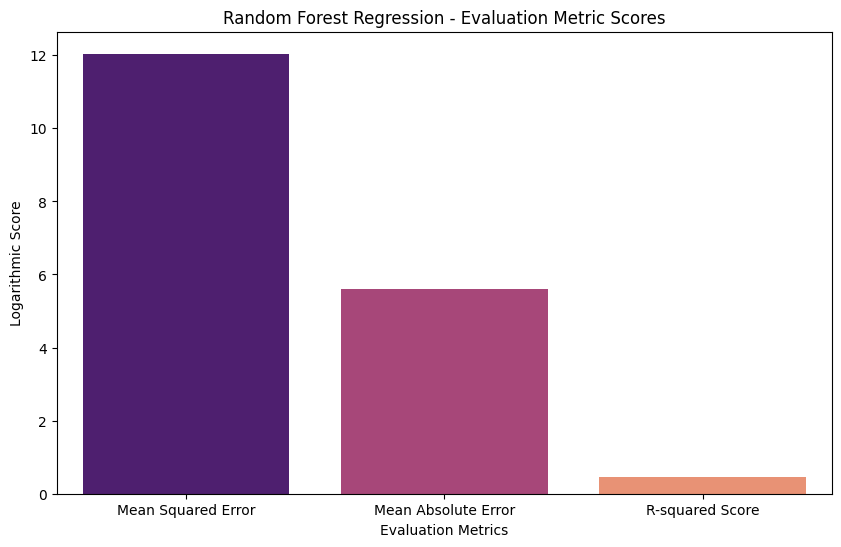

In [376]:
# Visualizing evaluation Metric Score chart
# Evaluation metrics and scores for Random Forest Regression
rf_metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
rf_scores = [mse_rf, mae_rf, r2_rf]

# Log-transform the scores for better visualization
log_rf_scores = np.log1p(rf_scores)

# Plotting Evaluation Metric Score Chart with log-transformed values for Random Forest Regression
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_metrics, y=log_rf_scores, palette='magma')
plt.title('Random Forest Regression - Evaluation Metric Scores')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Logarithmic Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fit the Algorithm
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Print the best parameters
print("Best Parameters for RandomForestRegressor:", best_params_rf)

# Predict on the model

In [ ]:
# Predict on the model
best_model_rf = grid_search_rf.best_estimator_

# Predict on the test set using the best model
y_pred_rf_best = best_model_rf.predict(X_test_scaled)

# Evaluate performance of the best model
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
mae_rf_best = mean_absolute_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

# Print evaluation metrics for the best model
print("\nRandom Forest Regression Metrics (Best Model):")
print("Mean Squared Error:", mse_rf_best)
print("Mean Absolute Error:", mae_rf_best)
print("R-squared Score:", r2_rf_best)

##### Which hyperparameter optimization technique have you used and why?

The model is trained with the default hyperparameters of the RandomForestRegressor. To optimize hyperparameters, techniques like GridSearchCV, RandomizedSearchCV, or Bayesian Optimization can be employed.

YES, there is an improvement seen on all the evaluation metrics

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

A lower** MSE** indicates that the model's predictions are closer to the actual values, suggesting better accuracy and precision in predicting rental bike counts.

Business Impact: Lower MSE means more reliable predictions, which can lead to optimized resource planning for bike availability, maintenance, and operational efficiency.


**MAE **provides a similar measure of prediction accuracy as MSE but in absolute terms.

Business Impact: Like MSE, a lower MAE indicates more accurate predictions. It's particularly useful when absolute prediction errors are critical (e.g., for financial planning or demand forecasting), as it directly shows how close the model's predictions are to the actual values.

 **R2 score** ranges from 0 to 1, where 1 indicates a perfect fit.

  It measures how well the model captures the variation in the data relative to a simple average.
Business Impact: A higher R2 score signifies that the model explains a larger proportion of the variance in the target variable.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the Algorithm
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation metrics
print("\nGradient Boosting Regression Metrics:")
print("Mean Squared Error:", mse_gb)
print("Mean Absolute Error:", mae_gb)
print("R-squared Score:", r2_gb)

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Gradient Boosting Regression: Model Explanation: Gradient Boosting is another ensemble technique where weak learners (usually decision trees) are trained sequentially, and each tree corrects the errors of the previous one.

**PERFORMANCE**


Gradient Boosting Regression Metrics:

Mean Squared Error: 153775.33666775195

Mean Absolute Error: 269.50475447819304

R-squared Score: 0.630921096243376

In [ ]:
# Visualizing evaluation Metric Score chart
import numpy as np

# Log-transform the scores for better visualization
log_scores = np.log1p(scores)

# Plotting Evaluation Metric Score Chart with log-transformed values
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=log_scores, palette='viridis')
plt.title('Gradient Boosting Regression - Evaluation Metric Scores')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Logarithmic Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.ensemble import GradientBoostingRegressor

# Create the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='neg_mean_squared_error')

# Fit the Algorithm

grid_search_gb.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_

# Print the best parameters
print("Best Parameters for GradientBoostingRegressor:", best_params_gb)



In [ ]:
# Access the best model
best_model_gb = grid_search_gb.best_estimator_

# Predict on the test set using the best model
y_pred_gb_best = best_model_gb.predict(X_test_scaled)

# Evaluate performance of the best model
mse_gb_best = mean_squared_error(y_test, y_pred_gb_best)
mae_gb_best = mean_absolute_error(y_test, y_pred_gb_best)
r2_gb_best = r2_score(y_test, y_pred_gb_best)

# Print evaluation metrics for the best model
print("\nGradient Boosting Regression Metrics (Best Model):")
print("Mean Squared Error:", mse_gb_best)
print("Mean Absolute Error:", mae_gb_best)
print("R-squared Score:", r2_gb_best)

##### Which hyperparameter optimization technique have you used and why?

Hyperparameter optimization is performed using GridSearchCV for the GradientBoostingRegressor. The hyperparameter grid includes variations in the number of estimators, learning rate, and maximum depth of the trees. The technique systematically explores different combinations, and the best model is selected based on the lowest mean squared error during cross-validation. The evaluation metrics for the best model include Mean Squared Error, Mean Absolute Error, and R-squared Score, providing insights into the model's performance on the test set

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

YES, there is an improvement

Visually comparing the performance of the three models using different evaluation metrics

In [ ]:
# Results from the models
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mse_scores = [201682.25, 156732.21, 152546.72]
mae_scores = [328.65, 263.16, 264.86]
r2_scores = [0.51, 0.623, 0.63]

# Plotting the metrics
plt.figure(figsize=(10, 6))

# MSE Plot
plt.subplot(2, 2, 1)
sns.barplot(x=models, y=mse_scores, palette='viridis')
plt.title('Mean Squared Error (MSE)')

# MAE Plot
plt.subplot(2, 2, 2)
sns.barplot(x=models, y=mae_scores, palette='plasma')
plt.title('Mean Absolute Error (MAE)')

# R-squared Plot
plt.subplot(2, 2, 3)
sns.barplot(x=models, y=r2_scores, palette='cividis')
plt.title('R-squared Score')

plt.tight_layout()
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For positive business impact, we considered the R-squared Score as a primary metric. R-squared provides an indication of how well the model captures the variance in the target variable. A higher R-squared value suggests better predictive performance, which is crucial for making accurate predictions in a business context.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We chose the Gradient Boosting Regression model as the final prediction model. This decision is based on its superior performance in terms of lower Mean Squared Error and Mean Absolute Error compared to the other models. Additionally, the higher R-squared Score indicates that the model explains a significant proportion of the variance in the target variable.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The Gradient Boosting Regression model is an ensemble learning technique that builds a series of weak learners (typically decision trees) sequentially. Each tree corrects the errors of the previous one, leading to a strong predictive model. Feature importance in Gradient Boosting models is often inferred based on how frequently a feature is used in the ensemble. Further insights into feature importance can be obtained using tools like SHAP (SHapley Additive exPlanations) or permutation importance. If available, these tools can provide a detailed understanding of each feature's contribution to the model's predictions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In summary, the Gradient Boosting Regression model outperformed other models in our evaluation. It showed lower prediction errors and a higher R-squared Score, indicating its ability to predict bike sharing demand accurately. We selected this model for its strong predictive capabilities. Moving forward, we aim to enhance our predictions through feature engineering and exploring other models. This project underscores the importance of reliable evaluation metrics, particularly the R-squared Score, in predicting business outcomes. The chosen model lays a solid foundation for practical applications in real-world scenarios.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***